In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Step 1 Get the required Data

In [48]:

train= pd.read_csv("D1 - Training Dataset.csv")
valid= pd.read_csv("D2 - Validation Dataset.csv")

In [49]:
x=train.iloc[:,2:].values
y=train.iloc[:,1].values

## Step 2 Divide Data into Test and Train

### Spliting Data in Train Test Validate Sets

In [50]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [51]:
x_val=valid.iloc[:,2:].values
y_val=valid.iloc[:,1].values

## Step 3 Check Data for any abnormalities and minssing values.

In [109]:
train.describe()

,Sno,Target,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
count,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2.053000e+03,2053.000000,2.053000e+03,2053.000000,2.053000e+03,2053.000000,2.053000e+03,2053.000000,2.053000e+03,2053.000000,2.053000e+03,2053.000000,2.053000e+03
mean,1027.000000,469863.614223,841.081344,39.469557,0.471505,1.437942e+06,0.226985,5.403381e+05,0.177789,7.062270e+04,0.237214,1.837478e+05,0.004384,1.062591e+05,0.003410,2.318558e+03,1.451047,6.787432e+04
std,592.794371,183152.965251,32.133762,7.212973,0.678112,3.286544e+06,0.548001,2.410844e+06,0.444868,2.608625e+05,0.510836,9.706686e+05,0.079474,4.685899e+06,0.079521,5.063420e+04,0.778090,1.189231e+05
min,1.000000,147000.000000,721.000000,25.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,514.000000,359000.000000,827.000000,34.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000e+00
50%,1027.000000,429000.000000,846.000000,38.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000e+00
75%,1540.000000,632000.000000,865.000000,45.000000,1.000000,2.200000e+06,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000,1.000000e+05
max,2053.000000,750000.000000,900.000000,55.000000,4.000000,6.590317e+07,5.000000,6.590317e+07,4.000000,3.530000e+06,3.000000,3.700000e+07,2.000000,2.123000e+08,3.000000,1.400000e+06,15.000000,1.133261e+06


In [110]:
train.isnull().values.any()

False

### At this point our trainning data set is clean and Free From Missing Values

## STEP 5 Data Preprocessing

In [18]:
from sklearn.preprocessing import RobustScaler

In [19]:
x_rob=RobustScaler(quantile_range=(25, 75)).fit_transform(x_train)

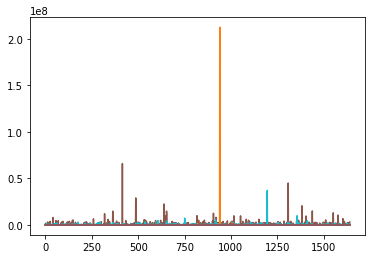

In [113]:
%matplotlib inline
plt.plot(x_rob)

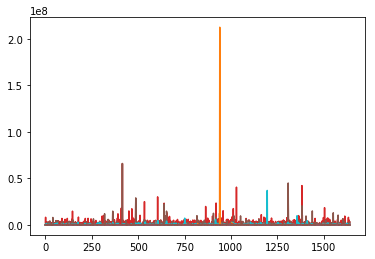

In [114]:
plt.plot(x_train)

Plot Shows Massive Outliers in our Data

Lets Analyse Independent Variables

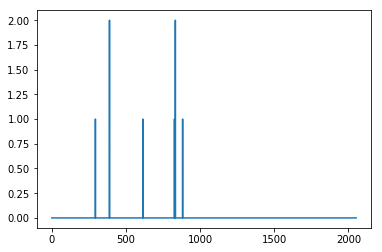

In [115]:
plt.plot(train.V11)

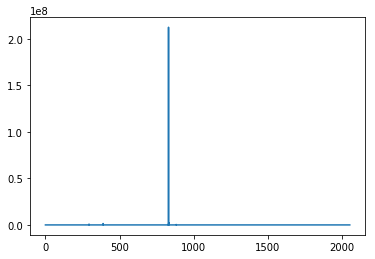

In [116]:
plt.plot(train.V12)

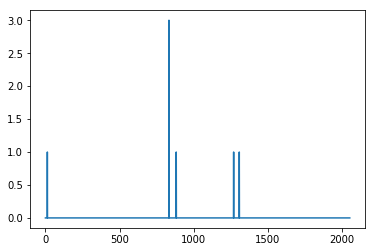

In [117]:
plt.plot(train.V13)

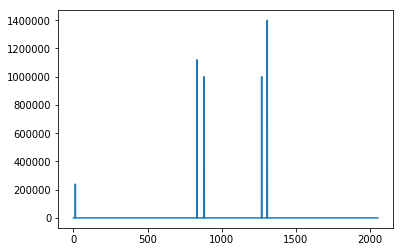

In [118]:
plt.plot(train.V14)

We can remove V11-V14 as they only have outliers in our data.

In [20]:
train.drop(['V11','V12','V13','V14'],axis=1,inplace=True)
valid.drop(['V11','V12','V13','V14'],axis=1,inplace=True)
x=train.iloc[:,2:].values
y=train.iloc[:,1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_val=valid.iloc[:,2:].values
y_val=valid.iloc[:,1].values

## STEP 6 Modelling

### Decision Tree Modelling

In [120]:

from sklearn.tree import DecisionTreeRegressor
regressorDt = DecisionTreeRegressor(max_depth=9,criterion='mae')
regressorDt.fit(x_train, y_train)
y_pred_Dt = regressorDt.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_Dt)


0.57813953083007619

In [121]:
y_val_DT = regressorDt.predict(x_val)
r2_score(y_val, y_val_DT)

0.47380629851346867

### Random Forest Modelling

In [122]:
from sklearn.ensemble import RandomForestRegressor

regressor_RF = RandomForestRegressor(n_estimators=250,max_depth=14 )

regressor_RF.fit(x_train, y_train)


y_pred_RF = regressor_RF.predict(x_test)


r2_score(y_test, y_pred_RF)

0.65262138014469873

In [123]:
y_val_RF = regressor_RF.predict(x_val)
r2_score(y_val, y_val_RF)

0.58369724383472643

### Finally Random Forest gave ~0.65 Rsquared for test Set and ~0.60 Rsquared for Validation Set 
##### Decison Tree gave ~0.60 Rsquared for test Set and ~0.50 Rsquared for Validation Set 

Variable y_val_RF have Final Validation Predicitons

In [103]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 9,
          learning_rate = 0.05, loss = 'ls',criterion='mae',max_features='sqrt')

In [104]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
             learning_rate=0.05, loss='ls', max_depth=9,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [105]:
clf.score(x_test,y_test)

0.65990050060422178